# Chapitre 6 - Machine Learning - Apprentissage supervisé -
Dans ce chapitre on va utilisé les modules du package SKLearn

## 6.1 Régression

In [44]:
import numpy as np
import matplotlib.pyplot as plt

### 6.1.1 Régression Linéaire
Génération des valeur de X.

In [45]:
array_gen=np.random.RandomState(seed = 0)
m=100
X = np.linspace( 0, 10, m).reshape( m, 1)

### Régression Linéaire
génération de Y. Affichage d'un data set qu'on peut le resoudre de maniére liéaire

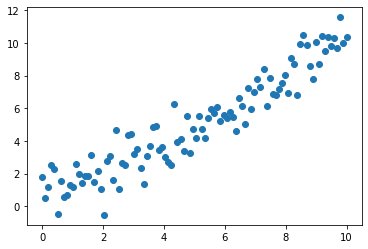

In [46]:
Y = X + array_gen.randn( m, 1)
plt.scatter(X,Y)

In [47]:
from sklearn.linear_model import LinearRegression#Imporation du module Linear Regression

In [48]:
model=LinearRegression()
model.fit(X, Y)
model.score(X, Y)

0.8881140743377214

Prediction des valeur de Y pour des features X

In [49]:
y_predict=model.predict(X)

Affichage

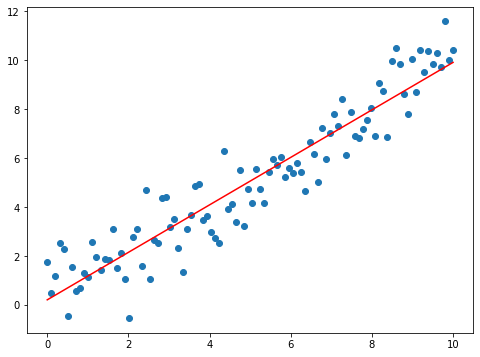

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.plot(X, y_predict, c="red")
plt.show()

### 6.1.2 Régression D'un Polynôme
Affichage d'un dataset qu'on peut le résoudre de manière polynomiale


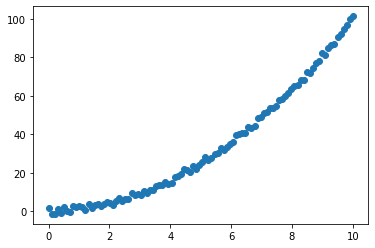

In [51]:
Y = X**2 + array_gen.randn( m, 1)
plt.scatter(X,Y)


Pour ce cas on ne peut pas le résoudre avec une méthode Linéair car cava nous donner ca


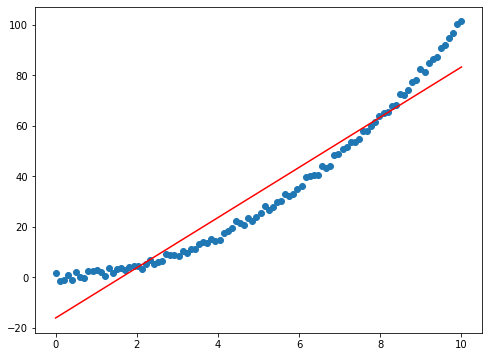

0.9325066328704199


In [52]:
model=LinearRegression()
model.fit(X, Y)
score=model.score(X, Y)
y_predict=model.predict(X)
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.plot(X, y_predict, c="red")
plt.show()
print(score)

Methode 1: Régression Polynomiale

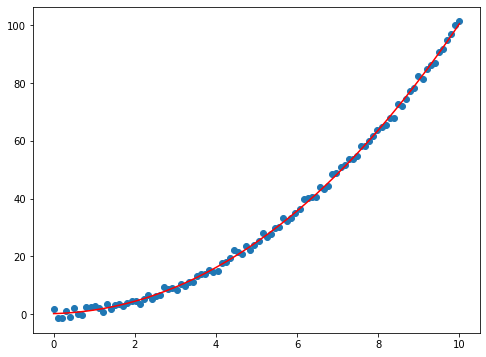

0.9989029946454291


In [53]:
from sklearn.preprocessing import PolynomialFeatures

features_poly=PolynomialFeatures(degree=3)
poly_X=features_poly.fit_transform(X)
model=LinearRegression()
#poly_X
model.fit(poly_X, Y)
y_predict = model.predict(poly_X)
score=model.score(poly_X, Y)

plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.plot(X, y_predict, c="red")
plt.show()
print(score)


Methode 2:SVR

On remarque automatiquement que le score est 0.9

In [54]:
from sklearn.svm import SVR #Imporation du module Linear Regression

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


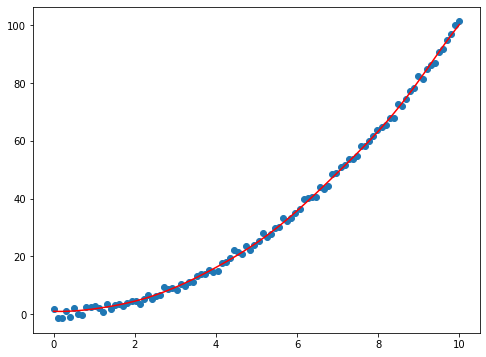

0.9989035418525655


In [55]:
model=SVR(C=100)
model.fit(X, Y)
score=model.score(X, Y)
y_predict=model.predict(X)
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.plot(X, y_predict, c="red")
plt.show()
print(score)

## 6.2 Classification

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np

In [57]:
data=pd.read_excel('src/datasets/titanic.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [58]:
data=data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data.dropna(axis=0, inplace=True)
data['sex'].replace(['male', 'female'], [ 0, 1], inplace=True)
data.head()

,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000


In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
X= data.drop(['survived'], axis=1)
Y=data['survived']
model=KNeighborsClassifier(n_neighbors=5).fit(X, Y)

In [61]:
(X_test, Y_test) = (X , Y)
score=model.score(X_test, Y_test)
score

0.8317399617590823

In [62]:
def survived( model, pclass=3, sex=0 ,age=25):
    X_me=np.array([pclass, sex, age]).reshape(1,3)
    return (model.predict(X_me), model.predict_proba(X_me))
def display(prediction_survive):
    (survived, survived_proba) = prediction_survive
    if survived == 0:
        print(f"Malheuresement si vous etiez a bord du titanic vous ne survivé pas")
        print(f"Votre Probabilité de survie est de {survived_proba[0,1]*100}%")
    else:
        print(f"Vous avez de la chanse, si vous etiez a bord du titanic vous survivé")
        print(f"Votre Probabilité de survie est de {survived_proba[0,1]*100}%")

display(survived(model))
print('-----------------------------------------------------------')
display(survived(model, pclass=2, sex=1, age=60))

Malheuresement si vous etiez a bord du titanic vous ne survivé pas
Votre Probabilité de survie est de 20.0%
-----------------------------------------------------------
Vous avez de la chanse, si vous etiez a bord du titanic vous survivé
Votre Probabilité de survie est de 60.0%


/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Amélioration de l'apprentissage:**

Comme vous remarquer nous avons évalué le score du modèle en se basant sur les mêmes données de l'apprentissage du modèle.
Pour évaluer vraiment la fiabilité du modèle il faut calculer le score avec des nouveau données qui n'a jamais vu.


C'est pour ca on utilise la fonction train test split du module *sklearn.model_selection* afin de diviser la dataset en 2. La première partie va être utilisée pour le training et la deuxième pour évaluer le modèle.
Autre chose Le paramètre *n_neighbors* peu affecté sur l'apprentissage car il définit le nombre de voisins les plus proches.


Ce qu'on doit faire:
- Évaluer le modèle avec des données qui na pas utilisé dans l'entraînement.
- changer la valeur du paramètres *n_neighbors* jusqu'à avoir le meilleur score.

**Exemple**
|  cross_validation/models      | Model A(param=1)         | Model B (param=2)        |
| :---------------: |:---------------:|:---------------:|
| T1 , T2 , T3 , T_val , T4  | 0.73           |  0.12  |  
| T1 , T2 , T_val , T3 , T4 | 0.97             |   0.45   |
| T1 , T_val , T2 , T3 , T4 | 0.57           |    0.2   |
| T1 , T_val , T2 , T3 , T4 | 0.74           |    0.73   |
| T_val , T1 , T2 , T3 , T4 | 0.73           |    0.98   |
| La Moyenne                | 0.72           |    0.69   |
|                | Validation cross         |      |



Le Modèle B est le modéle le plus pérformant.

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [64]:
iris = load_iris()
x = iris.data
y = iris.target
y_names = iris.target_names
print(y_names)
dict_names={ 0 : y_names[0], 1 : y_names[1], 2 : y_names[2]}
print(f"La dataset (x) contient {x.shape[0]} exemples et {x.shape[1]} variables")
print(f"La dataset (y) contient {np.unique(y).size} classes")

['setosa' 'versicolor' 'virginica']
La dataset (x) contient 150 exemples et 4 variables
La dataset (y) contient 3 classes


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
(x_train.shape, x_test.shape)

((120, 4), (30, 4))

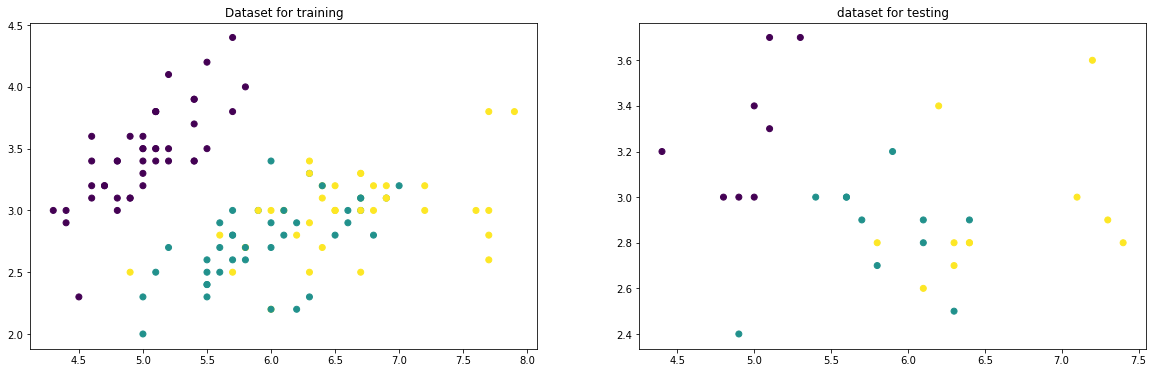

In [66]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.title("Dataset for training")
plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.title("dataset for testing")
plt.show()

Dans cette étape on modifie le paramètre *n_neighbors* [1 - 50] et on garde la valeur du paramètres qui corespond au meilleur score.

In [67]:
#choix du nombre de voisins [ 0 - 50 ]
models= [ KNeighborsClassifier( n_neighbors=i).fit(x_train, y_train) for i in np.arange(1,50) ]
#On calcule le score pour chaque modèle génere avec la deuxieme partie de test
scores=[ model.score(x_test, y_test) for model in models]
index_model=np.argmax(scores)
model=models[index_model]

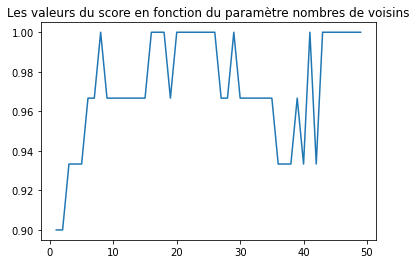

In [68]:
plt.plot(np.arange(1,50), scores)
plt.title('Les valeurs du score en fonction du paramètre nombres de voisins')
plt.show()

In [69]:
x_prec=np.array([4.5, 2.7, 3.9, 1.2]).reshape(1,4)
y_prec=model.predict(x_prec)

print(f"La fleur iris qui a les pètales de {x_prec[0,0]} de largeur et {x_prec[0,1]} de longeur s'appele : {dict_names[y_prec[0]]}")

La fleur iris qui a les pètales de 4.5 de largeur et 2.7 de longeur s'appele : versicolor


La meilleur facon est de divisé la dataset en utilisant SKLearn *Plus d'explication* 

Recomancant tout au debut

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
score_moy=cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring="accuracy").mean()

Par contre il faut aussi modifié et trouvé la meilleur valeur du paramètre *n_neighbors*

In [72]:
scores_i=[cross_val_score(KNeighborsClassifier(i), x_train, y_train, cv=5, scoring="accuracy").mean() for i in np.arange(1,50)]
score_top=(np.argmax(scores_i),np.max(scores_i))

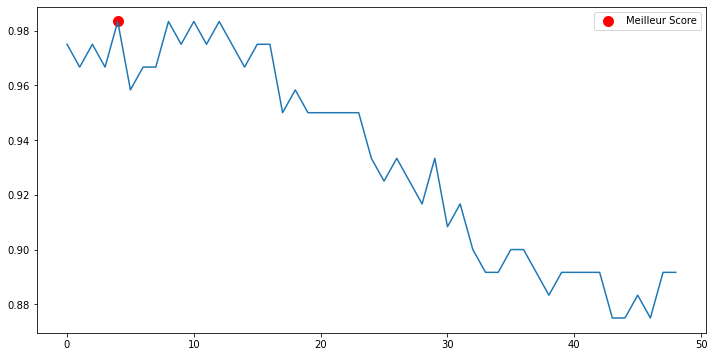

In [73]:
plt.figure(figsize=(12, 6))
plt.scatter(score_top[0], score_top[1], c="red", lw=5, label="Meilleur Score")
plt.plot(scores_i, label="")
plt.legend()
plt.show()

Autre Facon plus courte qui découpe le dataset calcul la moyenne des resultat de test validation + esseye avec plusieurs paramétres pour enfin définir le meilleur modéle en utilisant la data_test

In [74]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge


In [75]:
model=KNeighborsClassifier()
k=np.arange(1, 50)
train_score, val_score=validation_curve(model, X=x_train, y=y_train, param_name='n_neighbors', param_range=k, cv=5)

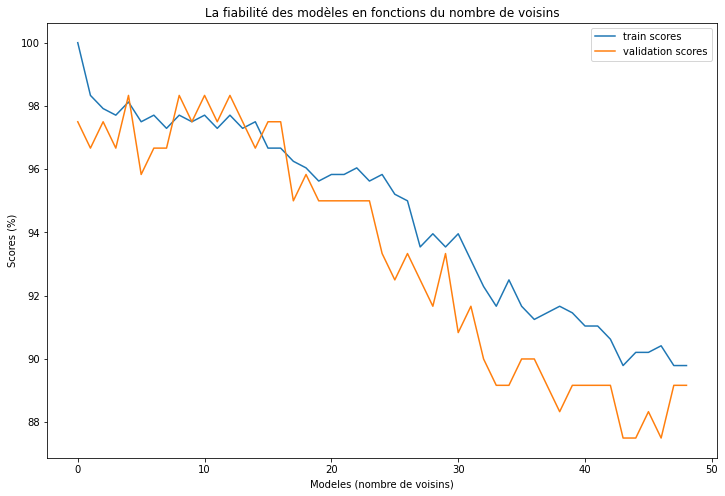

In [76]:
val_score.mean(axis=1)
plt.figure(figsize=(12,8))
plt.plot(train_score.mean(axis=1)*100, label='train scores')
plt.plot(val_score.mean(axis=1)*100, label='validation scores')
plt.xlabel("Modeles (nombre de voisins)")
plt.ylabel("Scores (%)")
plt.title("La fiabilité des modèles en fonctions du nombre de voisins")
plt.legend()
plt.show()

- Ce garphe nous permet de detecté si il y'a un overfit (surapprentissage). 

- On le remarque gace au scores des données de testing >> au scores des données de validation.

- Solution : diminuée les données d'entrainement (vérifié aussi si l'etape de détaction d'annomali a était bien faite).

- Sur le graphe on peut détécté le meilleur modèle. **Mais** il faut compté que les scores de validation ont été evalué seulement en fonction de nombre de voisins. c'est pour ca on doit obtenir les scores des modèles en fonctions des autres attribut pour trouvé la composition qui donne le meilleur modéle. et pour ca qu'on utilise:

<div align="center">GridSearchCv</div>





Cette fonction construit une -*grille*- de modèles avec toutes les -*combinaisons d'hyperparametres*- présents dans param_grid

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid= {
    'n_neighbors' : np.arange(1, 20),
    'metric' : ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [78]:
grid.best_score_

0.9833333333333334

In [79]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [80]:
best_model=grid.best_estimator_

In [81]:
best_model.score(x_test, y_test)

0.9333333333333333

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_model.predict(x_test))
cm

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

Derniere etape pour augmenté l'apprentissage en utilissant les courbes d'apprentissage (Pour définir la quantité de dataset suffisante pour l'appretissage): **Learning curves**

In [83]:
from sklearn.model_selection import learning_curve


In [86]:
pourc, train_score, val_score = learning_curve( k, x_train, y_train, train_sizes=np.linspace(0.2, 1.0, 5), cv=5)

TypeError: estimator should be an estimator implementing 'fit' method, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]) was passed

In [85]:
plt.figure(figsize =(10,8))
plt.plot(pourc, train_score.mean(axis=1), label='train')
plt.plot(pourc, val_score.mean(axis=1), label='validation')
plt.xlabel("train size")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()

NameError: name 'pourc' is not defined

<Figure size 720x576 with 0 Axes>

Etapes:
- Division de la dataset (train_test_split).
- Trouver les meilleurs paramètres pour le modele (GridSearchCV).
- Evaluation du modele (metrics).
- courbes de validation/apprentissage pour verifié overfiting.- savoir si on peut amélioré notre modele en l'entrainement avec d'autre données.

**Un Peut Plus Sur La Cross Validation :** Afinir

Type d'erreur Afinir